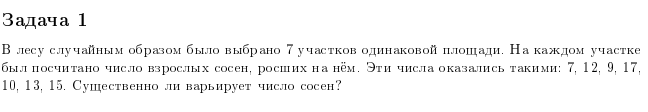

Эта задача на проверку гипотезы - соответствует ли распределение деревьев нормальному


Пробую сделать через критерий Пирсона (хи-квадрат)
Нуль гипотеза - Число сосен подчиняется нормальному распределению

In [1]:
from scipy import stats
import numpy as np


In [3]:
a = np.array([7,12,9,17,10,13,15])
stats.zscore(a)

array([-1.50554531,  0.04428074, -0.88561489,  1.59410679, -0.57564968,
        0.35424595,  0.97417637])

# Task 2

In [23]:
male_dr = [0.045, 0.029, 0.0062, 0.52]
female_dr = [0.26, 0.017, 0.0081, 0.14]

Попрака Шидака

In [9]:
1-(1 - min(male_dr))**4

0.02457031183436631

In [7]:
1-(1 - min(female_dr))**4

0.0320084614593279

Для мужских особей минимальный уровень значимости = 0.03

Для женских особей минимальный уровень значимости = 0.04

In [31]:
a = 0.05
male_dr.sort()
female_dr.sort()
for Km,Kf in zip(range(len(male_dr)),range(len(female_dr))):
    if (male_dr[Km] < (Km+1)*a/4):
        print("Male min = "+str(Km+1))
    if (female_dr[Kf] < (Kf+1)*a/4):
        print("Female min = "+str(Kf+1))

Male min = 1
Female min = 1
Female min = 2


## Task 3

In [32]:
W = 29903
A = 8954
T = 9594
G = 5863
C = 5492

In [54]:
Pa = A/W
Pt = T/W
Pg = G/W
Pc = C/W

In [72]:
perm = [Pa,Pt,Pg,Pc]

In [101]:
# Независимая вероятность встретить TA
TA = T/W*A/W*W
TA

2872.7778483764173

In [100]:
0.252* 29903

7535.5560000000005

In [52]:
TA*W

2872.7778483764173

In [45]:
a = 0
for l1 in [A,T,G,C]:
    for l2 in [A,T,G,C]:
        p = l1/W*l2/W
        a += p*W
a

29903.000000000004

In [82]:
pair = list(np.random.choice(['A','T','G','C'],2,p = perm))
pair

['T', 'C']

In [84]:
pair == ['T','C']

True

In [98]:
from tqdm import tqdm
TA_list = []
for i in tqdm(range(1000)):
    TA_num = 0
    for l in range(29903):
        pair = list(np.random.choice(['A','T','G','C'],2,p = perm))
        if pair == ['T','A']:
            TA_num += 1 
    TA_list.append(TA_num)  


100%|██████████| 1000/1000 [10:29<00:00,  1.59it/s]


In [96]:
a = 0
for e in TA_list:
    if e < 2800:
        a += 1
np.mean(TA_list)

2869.16

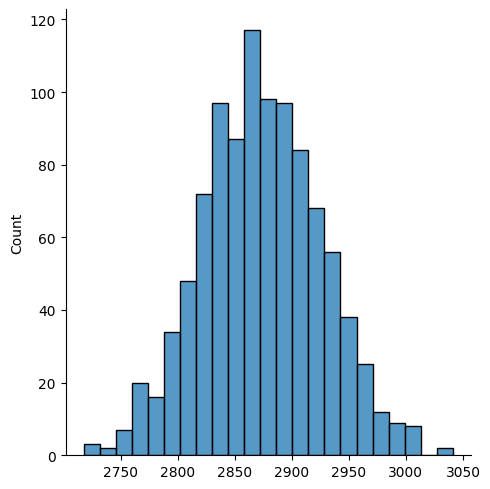

In [102]:
import seaborn as sns
sns.displot(TA_list)